In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from sklearn.linear_model import LinearRegression 

In [2]:
df = pd.read_csv('expenses.csv' , header=0)
df= pd.DataFrame(df)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df = pd.get_dummies(df)

In [5]:
df.rename(columns={'sex_male': 'sex'}, inplace=True)

In [6]:
df.rename(columns={'smoker_yes': 'smoker'}, inplace=True)

In [7]:
list = ['sex_female' , 'smoker_no']
df = df.drop(list , axis=1)
df.head()

,age,bmi,children,charges,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0


In [8]:
X = df.drop('charges' , axis=1)
y = df['charges']


## using sklearn library

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train ,X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [11]:
model = LinearRegression()
model.fit(X_train ,y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test)
y_train_a = model.predict(X_train)

In [15]:
print(y_pred ,"------------",y_train_a)

[ 8969.55027444  7068.74744287 36858.41091155  9454.67850053
 26973.17345656 10864.11316424   170.28084137 16903.45028662
  1092.43093614 11218.34318352 28101.68455267  9377.73460205
  5263.0595179  38416.04221107 40255.82339284 37098.25353123
 15240.39392306 35912.88264434  9112.52398703 31461.92108909
  3847.68845883 10130.12001517  2370.54189389  7140.21550828
 11301.76782638 12961.65366224 14509.47251876  6159.8976107
  9963.85857263  2177.85718217  9115.93673493 13073.68932159
  4561.82376202  3408.20756033  4459.81359745 13032.06505076
  1979.99357292  8813.28303302 33271.29124448 32585.51583927
  3908.76090964  4326.10774721 14142.81326533 11423.45494846
  8774.13955311 12097.28051001  5281.57353499  3150.5596042
 35494.46461214  9150.1124786  15836.84575621  2343.57470069
 12364.78414194  1482.29488266 13389.06105161 12573.57395972
  4341.83680558 32165.33688042 13321.3360032  12896.82071102
 14167.99421483 10506.17623512 16360.78543548  7763.89824584
 11839.25019431  4061.1975

In [16]:
from sklearn.metrics import  r2_score

In [23]:
r2_score(y_test , y_pred)

0.7835929767120723

In [18]:
r2_score(y_train , y_train_a)

0.7417255854683333

In [19]:
print(X_train.shape , "-----" , y_train.shape)

(1070, 9) ----- (1070,)


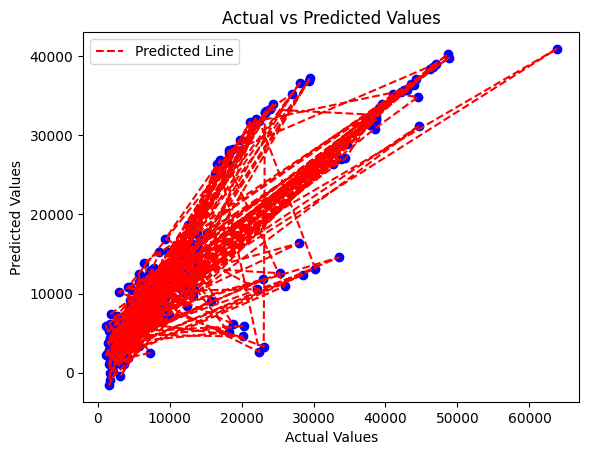

In [24]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, c='b')  # Actual values in blue
plt.plot(y_test, model.predict(X_test), 'r--', label='Predicted Line')  # Predicted line in red
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

regularization method -> before use regularization always turn data into standaradization formarte

In [25]:
from sklearn.preprocessing import  StandardScaler

In [26]:
scaler = StandardScaler()

In [29]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Mean absolute error 4181.974349710989
R2 Score 0.7835685003833539


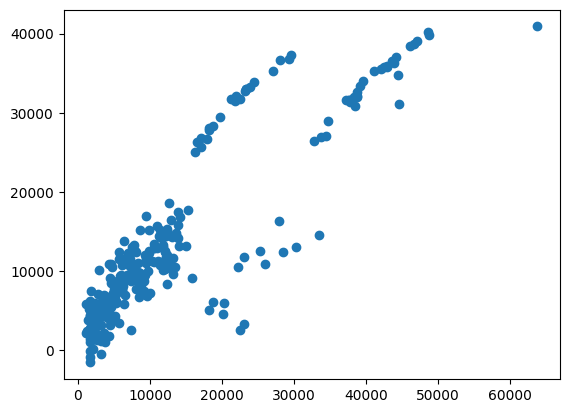

In [30]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge(alpha=0.5)
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

In [31]:
from sklearn.model_selection import  validation_curve

In [35]:
validation_curve?

Signature:
validation_curve(
    estimator,
    X,
    y,
    *,
    param_name,
    param_range,
    groups=None,
    cv=None,
    scoring=None,
    n_jobs=None,
    pre_dispatch='all',
    verbose=0,
    error_score=nan,
    fit_params=None,
)
Docstring:
Validation curve.

Determine training and test scores for varying parameter values.

Compute scores for an estimator with different values of a specified
parameter. This is similar to grid search with one parameter. However, this
will also compute training scores and is merely a utility for plotting the
results.

Read more in the :ref:`User Guide <validation_curve>`.

Parameters
----------
estimator : object type that implements the "fit" and "predict" methods
    An object of that type which is cloned for each validation.

X : array-like of shape (n_samples, n_features)
    Training vector, where `n_samples` is the number of samples and
    `n_features` is the number of features.

y : array-like of shape (n_samples,) or (n_samples, 

In [37]:
param_range = np.logspace(-2,8,100)
param_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      